# Intro ML Homework 3
## Name: Jaskin Kabir
## Student ID: 801186717
Github: https://github.com/jaskinkabir/Intro_ML/tree/main/HM3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



path = 'diabetes.csv'

dataset = pd.read_csv(path)
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_data = dataset.iloc[:, :-1].values
Y_data = dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_data)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def gen_data(df: pd.DataFrame):
    if isinstance(df, pd.DataFrame):
        data = df.to_numpy()
    data = df
    X0 = np.ones((data.shape[0], 1))
    X = np.hstack((X0, data))
    return X
X_train = gen_data(X_train)
X_test = gen_data(X_test)

In [82]:
from sklearn import metrics

class LogisticRegression:
    def __init__(self, X, Y, scaler, test_split=0.8):
        self.X = X
        self.Y = Y
        self.theta = np.zeros((self.X.shape[1]+1,1))
        self.scaler = scaler
        self.X = self.scaler.fit_transform(self.X)
        
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=test_split, random_state=0)
        self.X_train = self.gen_data(self.X_train)
        self.X_test = self.gen_data(self.X_test)
        
        self.Y_train = self.Y_train.reshape(-1, 1)
        self.Y_test = self.Y_test.reshape(-1, 1)
        
    def gen_data(self, df: pd.DataFrame):
        if isinstance(df, pd.DataFrame):
            data = df.to_numpy()
        data = df
        X0 = np.ones((data.shape[0], 1))
        X = np.hstack((X0, data))
        return X
    
    def predict(self, X):
        return 1 / (1 + np.exp(-np.dot(X, self.theta)))
    
    def train(self, lmbda, alpha, epochs):
        self.training_history = []
        self.test_history = []
        self.training_accuracy = []
        self.test_accuracy = []
        for _ in range(epochs):
            pred = self.predict(self.X_train)
            test_pred = self.predict(self.X_test)
            error = np.subtract(pred, self.Y_train)
            test_error = test_pred - self.Y_test
            gradient = (1/self.X_train.shape[0]) * np.dot(self.X_train.T, error) + lmbda * self.theta
            self.theta -= alpha * gradient
            
            J = np.sqrt(np.sum(error ** 2) / (2 * self.X_train.shape[0]))
            J_test = np.sqrt(np.sum(test_error ** 2) / (2 * self.X_test.shape[0]))
            
            self.training_history.append(J)
            self.test_history.append(J_test)
            self.training_accuracy.append(metrics.accuracy_score(self.Y_train, np.round(pred)))
            self.test_accuracy.append(metrics.accuracy_score(self.Y_test, np.round(test_pred)))
    
    def plot_cost(self, title):
        plt.plot(self.training_history, label='Training')
        plt.plot(self.test_history, label='Validation')
        plt.title(title)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.show()
    def plot_accuracy(self, title):
        plt.plot(self.training_accuracy, label='Training')
        plt.plot(self.test_accuracy, label='Validation')
        plt.title(title)
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        

Train cost: 0.2748260350247633
Test cost: 0.28271045717985815


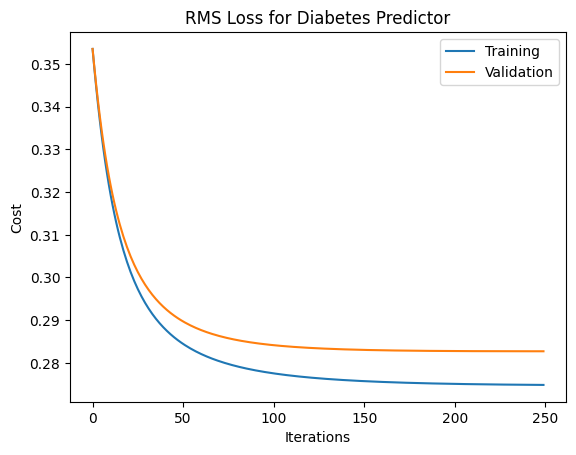

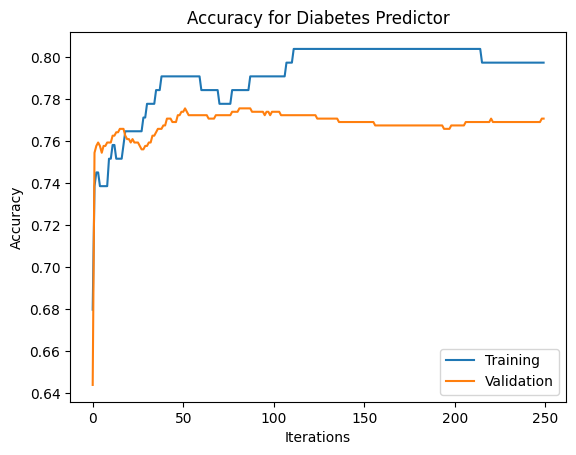

In [83]:
model = LogisticRegression(X_data, Y_data, scaler)
model.train(lmbda=0.0, alpha=0.1, epochs=250)
print(f"Train cost: {model.training_history[-1]}")
print(f"Test cost: {model.test_history[-1]}")
model.plot_cost('RMS Loss for Diabetes Predictor')
model.plot_accuracy('Accuracy for Diabetes Predictor')

In [86]:
X_pred = np.round(model.predict(model.X_test))

print(f"Accuracy: {metrics.accuracy_score(model.Y_test, X_pred)}")
print(f"Precision: {metrics.precision_score(model.Y_test, X_pred)}")
print(f"Recall: {metrics.recall_score(model.Y_test, X_pred)}")
print(f"F1 Score: {metrics.f1_score(model.Y_test, X_pred)}")
print(f"Confusion Matrix: \n{metrics.confusion_matrix(model.Y_test, X_pred)}")



Accuracy: 0.7707317073170732
Precision: 0.75
Recall: 0.5342465753424658
F1 Score: 0.6240000000000001
Confusion Matrix: 
[[357  39]
 [102 117]]


ValueError: non-broadcastable output operand with shape (9,1) doesn't match the broadcast shape (9,153)

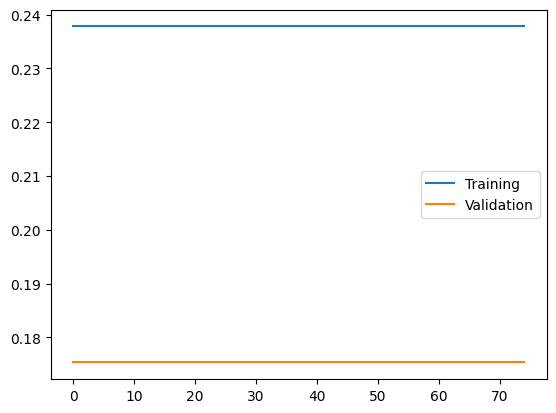

In [79]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics

def compute_cost(m, Y, Y_pred):
    error = np.subtract(Y_pred, Y)
    return np.sqrt(np.sum(error ** 2) / (2 * m))
    

iters = 75
train_hist = np.zeros(iters)
test_hist = np.zeros(iters)
model = LogisticRegression(warm_start=True, solver="liblinear")
for i in range(iters):
    
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    m = X_train.shape[0]
    train_hist[i] = metrics.mean_squared_error(Y_train, Y_pred_train)
    test_hist[i] = metrics.mean_squared_error(Y_test, Y_pred_test)
    

plt.plot(train_hist, label='Training')
plt.plot(test_hist, label='Validation')
plt.legend()
plt.show()


In [4]:
from sklearn.metrics import confusion_matrix
cnf_mat = confusion_matrix(Y_test, Y_pred)
cnf_mat

array([[98,  9],
       [18, 29]], dtype=int64)

In [5]:
from sklearn import metrics

